CAPSTONE INTRODUCTION

Breast cancer is the most frequently diagnosed cancer among women worldwide, with over 2.3 million new cases reported annually, accounting for nearly one in four cancer diagnoses in females12. Despite advancements in treatment and awareness, it remains a leading cause of cancer-related deaths, with significant variations in incidence and mortality across different regions34. The global burden of breast cancer is projected to rise further due to population growth and aging, emphasizing the urgent need for innovative solutions to combat this disease3.
In recent years, the integration of machine learning (ML) techniques into healthcare has revolutionized breast cancer prediction models. These models harness vast datasets, including demographic, clinical, and imaging data, to identify patterns and risk factors associated with breast cancer development. By leveraging advanced algorithms, they provide healthcare professionals with tools to improve diagnostic accuracy, facilitate early detection, and personalize treatment strategies.
The development of these models represents a significant milestone in medical technology. They not only enhance the precision of breast cancer diagnosis but also empower clinicians to make timely interventions that can improve patient outcomes. As research progresses and technology evolves, breast cancer prediction models hold the potential to transform global healthcare by reducing mortality rates and alleviating the growing burden of this disease23.


OBJECTIVE:
1. The primary objective of developing a breast cancer prediction model is to facilitate early diagnosis, which is crucial for improving patient outcomes. By accurately predicting the likelihood of malignancy in breast masses, these models enable healthcare providers to make informed decisions regarding further diagnostic testing and treatment options 
2. Early detection of breast cancer significantly improves prognosis and survival rates. By accurately predicting the likelihood of breast cancer, healthcare providers can initiate timely clinical interventions, which can lead to better treatment outcomes and potentially save lives.
3. Predictive models help in assessing individual risk factors associated with breast cancer, such as family history, age, and mammographic features. Understanding these risks enables personalized screening strategies and preventive measures tailored to individual patients 

PROCESS FLOW

1. Data Extraction -  data source kaggle , downloaded it and uploaded it to my GitHub for easy retrieval.
2. Data Cleaning -  This involved removing null values, Also checking the fields are correct in terms of spelling.
3. EDA – Created visualizations to show the distribution of the dataset, correlations and analyzing the data.
4. Modelling - training the data for prediction
5. Hypothesis Testing- Proving NULL and Alternate Hypothesis.


BREAST CANCER DATASET

METADATA
1. S/N: index values
2. Year: what year the tumor was discovered in patient
3. Age: age of the patient at the time of diagnosis
4. Menopause: whether the patient is pre- or postmenopausal at time of diagnosis (1 - postmenopausal, 0 - premenopausal)
5. Tumor Size (cm): tumor size in cm
6. Inv-Nodes: the number (range 0 - 3) of axillary lymph nodes that contain metastatic breast cancer visible on histological examination;
7. Breast: breast on which cancer was discovered (left/right)
8. Metastasis: presence of metastasis (1 - yes, 0 - no)
9. Breast Quadrant: breast can be divided into four quadrants, with the nipple as the central point
10. History: whether breast cancer was present in the patient's family history (1 - present, 0 - not present)
11. Diagnosis Result: type of breas cancer (benign /malignant).

NB: Benign - Not life threatning and will not spreadto other parts of the body
     Malignant - Cancerous cells that grow uncontrollably and can spread to other parts of the body
     Metastasis refers to the process by which cancer cells spread from the original (primary) tumor to distant parts of the body, forming new (secondary) tumors.

LOADING LIBRARIES

In [32]:
#Loading the libraries

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import metrics

#Loading Libraries for machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error




LOADING THE DATASET / INGESTING

In [33]:
#Loading the Dataset
path = 'https://raw.githubusercontent.com/waithera-shop/Breast_Cancer/refs/heads/main/BREASTCANCER2.csv'
df = pd.read_csv(path)
df

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
200,209,2020,49,1,6,3,Right,1,Lower inner,1,Malignant
201,210,2020,28,1,3,0,Left,0,Upper inner,0,Benign
202,211,2020,22,1,1,0,Left,0,Upper outer,1,Benign
203,212,2020,19,1,1,0,Left,0,Lower inner,1,Benign


DATA PREPARATION

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   S/N               205 non-null    int64 
 1   Year              205 non-null    int64 
 2   Age               205 non-null    int64 
 3   Menopause         205 non-null    int64 
 4   Tumor Size (cm)   205 non-null    int64 
 5   Inv-Nodes         205 non-null    int64 
 6   Breast            205 non-null    object
 7   Metastasis        205 non-null    int64 
 8   Breast Quadrant   205 non-null    object
 9   History           205 non-null    int64 
 10  Diagnosis Result  205 non-null    object
dtypes: int64(8), object(3)
memory usage: 17.7+ KB


In [35]:
#describing the data
df.describe()

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Metastasis,History
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,107.063415,2019.521951,39.712195,0.663415,4.287805,0.356098,0.346341,0.409756
std,61.700978,0.500741,14.161883,0.473698,2.572497,0.509733,0.476968,0.492993
min,1.000000,2019.000000,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,55.000000,2019.000000,30.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,107.000000,2020.000000,40.000000,1.000000,4.000000,0.000000,0.000000,0.000000
75%,159.000000,2020.000000,49.000000,1.000000,6.000000,1.000000,1.000000,1.000000
max,213.000000,2020.000000,77.000000,1.000000,14.000000,3.000000,1.000000,1.000000


In [36]:
#Count confirmation of null values
df.isna().sum()

S/N                 0
Year                0
Age                 0
Menopause           0
Tumor Size (cm)     0
Inv-Nodes           0
Breast              0
Metastasis          0
Breast Quadrant     0
History             0
Diagnosis Result    0
dtype: int64

In [37]:
#renaming
df['Breast Quadrant'] = df['Breast Quadrant'].replace('Upper outer ', "upper outer")
df

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
200,209,2020,49,1,6,3,Right,1,Lower inner,1,Malignant
201,210,2020,28,1,3,0,Left,0,Upper inner,0,Benign
202,211,2020,22,1,1,0,Left,0,Upper outer,1,Benign
203,212,2020,19,1,1,0,Left,0,Lower inner,1,Benign


In [38]:
#rename the column Breast Quadrant
df['Breast Quadrant'] = df['Breast Quadrant'].replace('upper outer', "Upper outer")
df

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
200,209,2020,49,1,6,3,Right,1,Lower inner,1,Malignant
201,210,2020,28,1,3,0,Left,0,Upper inner,0,Benign
202,211,2020,22,1,1,0,Left,0,Upper outer,1,Benign
203,212,2020,19,1,1,0,Left,0,Lower inner,1,Benign


In [39]:
#dropping s/n 
df.drop("S/N", axis = 1, inplace = True)
df

,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,2019,21,1,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...
200,2020,49,1,6,3,Right,1,Lower inner,1,Malignant
201,2020,28,1,3,0,Left,0,Upper inner,0,Benign
202,2020,22,1,1,0,Left,0,Upper outer,1,Benign
203,2020,19,1,1,0,Left,0,Lower inner,1,Benign


In [40]:
df.columns

Index(['Year', 'Age', 'Menopause', 'Tumor Size (cm)', 'Inv-Nodes', 'Breast',
       'Metastasis', 'Breast Quadrant', 'History', 'Diagnosis Result'],
      dtype='object')

In [41]:
#checking yearly distribution
df['Year'].value_counts()

Year
2020    107
2019     98
Name: count, dtype: int64

In [42]:
#distribution off the diagnosis
df['Diagnosis Result'].value_counts()

Diagnosis Result
Benign       116
Malignant     89
Name: count, dtype: int64

EXPLATORY DATA ANALYSIS (EDA)

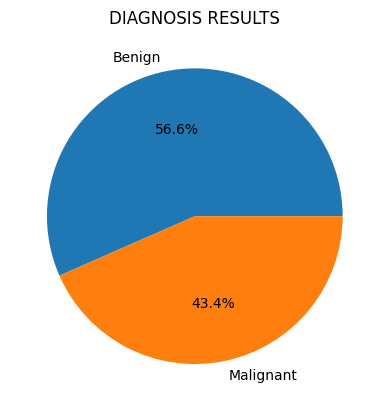

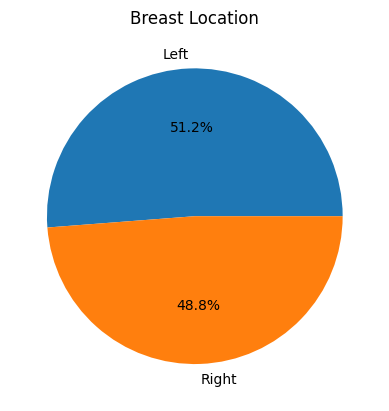

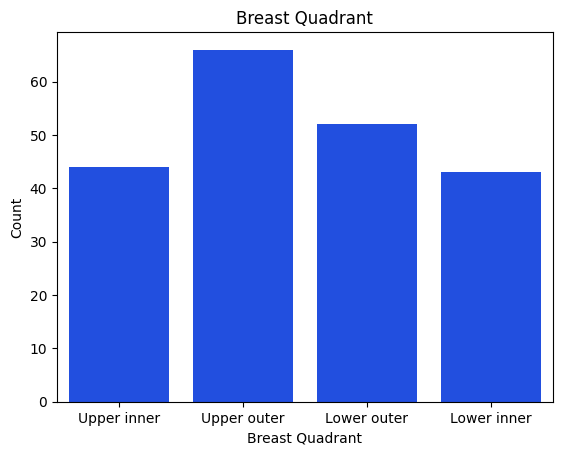

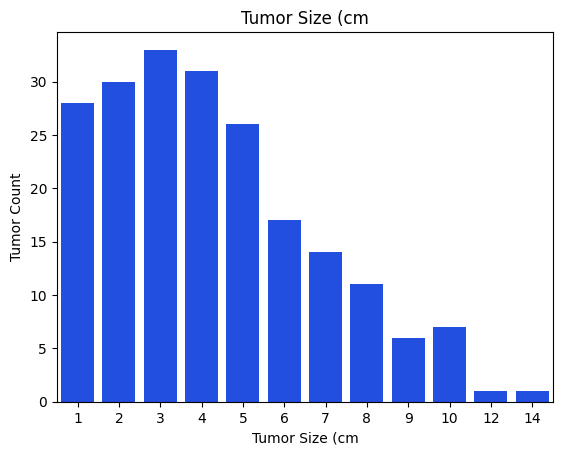

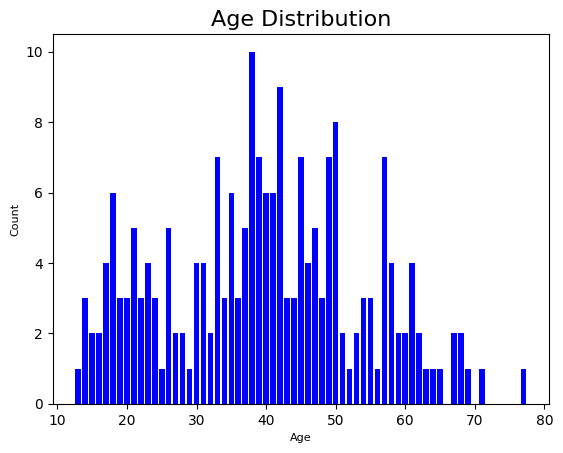

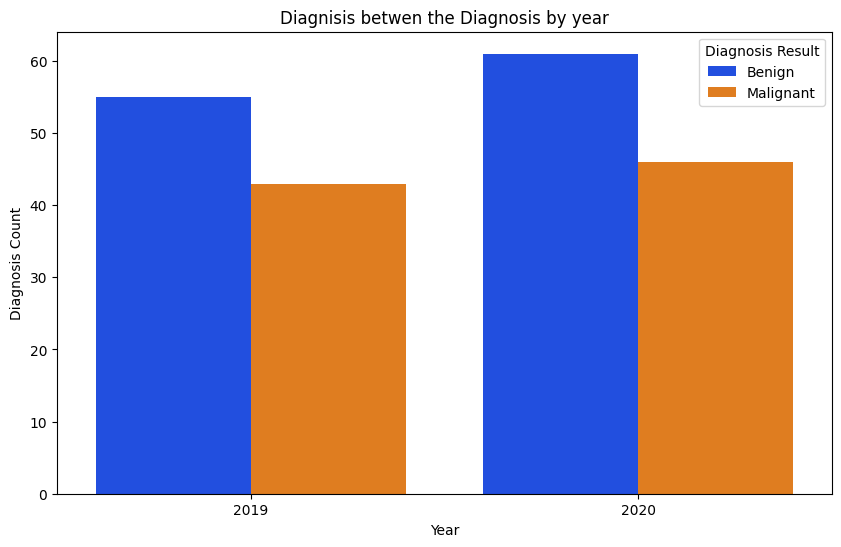

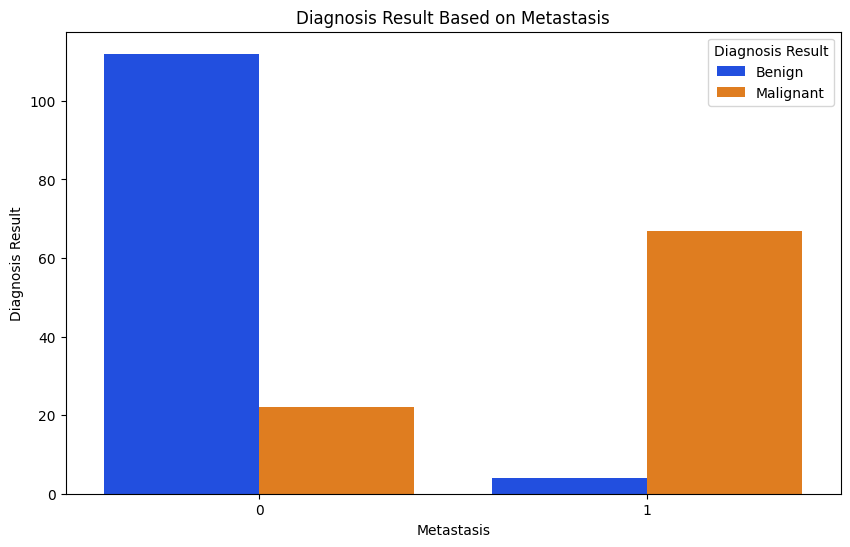

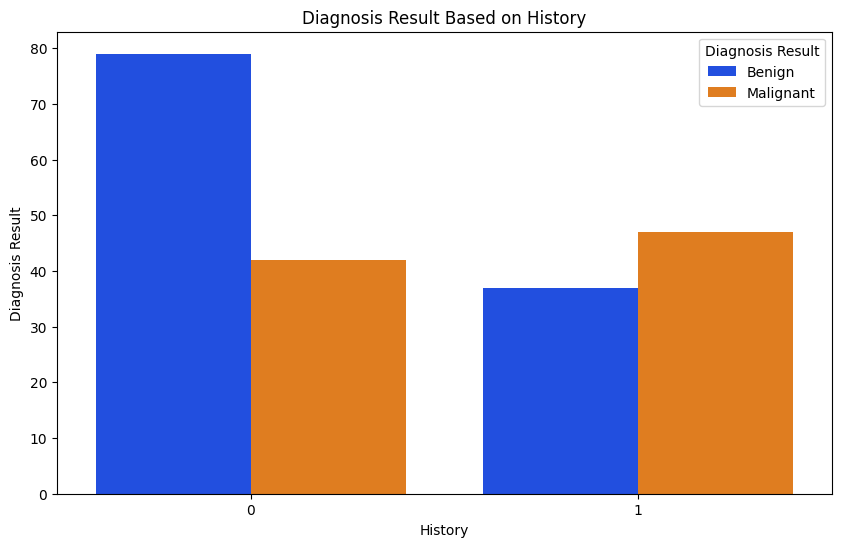

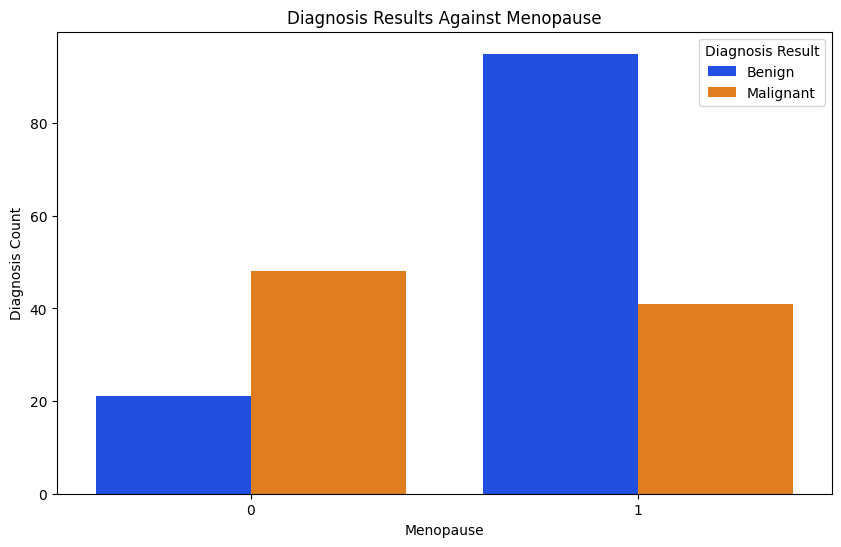

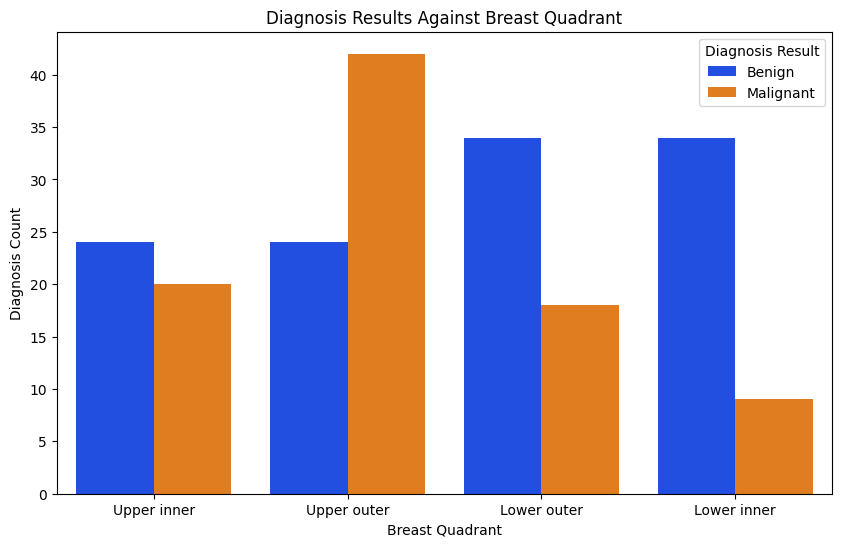

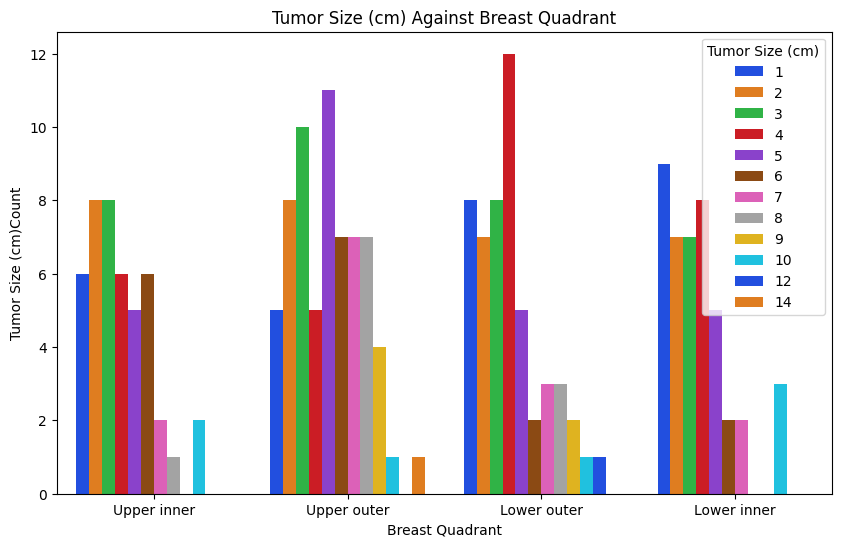

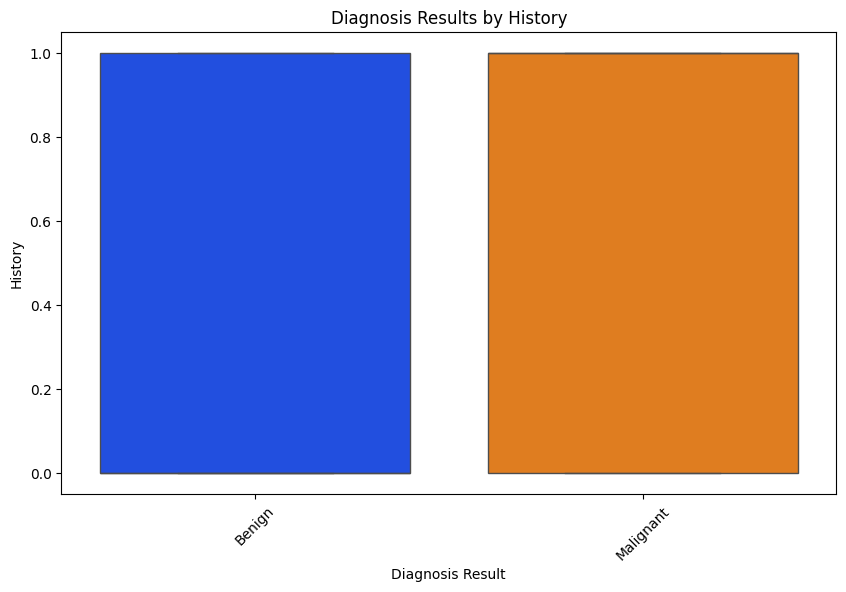

In [43]:
## visualizing  Count of DIAGNOSIS distribution
DIAGNOSIS = df['Diagnosis Result'].value_counts()
labels = DIAGNOSIS.index
plt.pie(DIAGNOSIS, autopct='%1.1f%%', labels=labels)
plt.title('DIAGNOSIS RESULTS')
plt.show()

## visualizing  Count of DIAGNOSIS distribution
Breastside = df['Breast'].value_counts()
labels = Breastside.index
plt.pie(Breastside, autopct='%1.1f%%', labels=labels)
plt.title('Breast Location')
plt.show()

# visualizing Distribution Per Quadrant
sns.countplot(x='Breast Quadrant', data=df, palette='bright' , legend = False , hue=False)
plt.xlabel('Breast Quadrant')
plt.ylabel('Count')
plt.title('Breast Quadrant')
plt.show()

# visualizing Distribution Of Tumor
sns.countplot(x='Tumor Size (cm)', data=df,legend = False , hue=False , palette='bright')
plt.xlabel('Tumor Size (cm')
plt.ylabel('Tumor Count')
plt.title('Tumor Size (cm')
plt.show()

#Checking the Age Distribution
PatientsAge = df['Age'].value_counts().sort_index()
plt.bar(PatientsAge.index, PatientsAge.values, color='blue')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.show()

#Checking yearly diagnosis
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df, hue='Diagnosis Result', palette='bright')
plt.title('Diagnisis betwen the Diagnosis by year')
plt.xlabel('Year')
plt.ylabel('Diagnosis Count')
plt.show()

#Metastasis Against Diagnosis Result
plt.figure(figsize=(10, 6))
sns.countplot(x='Metastasis', data=df, hue='Diagnosis Result', palette='bright')
plt.title('Diagnosis Result Based on Metastasis')
plt.xlabel('Metastasis')
plt.ylabel('Diagnosis Result')
plt.show()

#History Against Diagnosis Result
plt.figure(figsize=(10, 6))
sns.countplot(x='History', data=df, hue='Diagnosis Result', palette='bright')
plt.title('Diagnosis Result Based on History')
plt.xlabel('History')
plt.ylabel('Diagnosis Result')
plt.show()

#Checking Menopause Against Diagnosis
plt.figure(figsize=(10, 6))
sns.countplot(x='Menopause', data=df, hue='Diagnosis Result', palette='bright')
plt.title('Diagnosis Results Against Menopause')
plt.xlabel('Menopause')
plt.ylabel('Diagnosis Count')
plt.show()

#Checking Breast Quadrant Against Diagnosis
plt.figure(figsize=(10, 6))
sns.countplot(x='Breast Quadrant', data=df, hue='Diagnosis Result', palette='bright')
plt.title('Diagnosis Results Against Breast Quadrant')
plt.xlabel('Breast Quadrant')
plt.ylabel('Diagnosis Count')
plt.show()

#Checking Breast Quadrant Against Tumor Size (cm)
plt.figure(figsize=(10, 6))
sns.countplot(x='Breast Quadrant', data=df, hue='Tumor Size (cm)', palette='bright')
plt.title('Tumor Size (cm) Against Breast Quadrant')
plt.xlabel('Breast Quadrant')
plt.ylabel('Tumor Size (cm)Count')
plt.show()

# checking for outliers using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis Result',y='History', data=df, palette='bright' , hue = 'Diagnosis Result')
plt.title('Diagnosis Results by History')
plt.xlabel('Diagnosis Result')
plt.ylabel('History')
plt.xticks(rotation=45)
plt.show()

In [44]:
df.drop(columns=['Year' , 'Breast' ,'Breast Quadrant'], axis = 1, inplace = True)
df
2

2

In [45]:
df['Diagnosis Result'] = np.where(df['Diagnosis Result'] == 'Malignant', '1', '0')
df

,Age,Menopause,Tumor Size (cm),Inv-Nodes,Metastasis,History,Diagnosis Result
0,40,1,2,0,0,0,0
1,39,1,2,0,0,0,0
2,45,0,4,0,0,0,0
3,26,1,3,0,0,1,0
4,21,1,1,0,0,1,0
...,...,...,...,...,...,...,...
200,49,1,6,3,1,1,1
201,28,1,3,0,0,0,0
202,22,1,1,0,0,1,0
203,19,1,1,0,0,1,0


<Axes: >

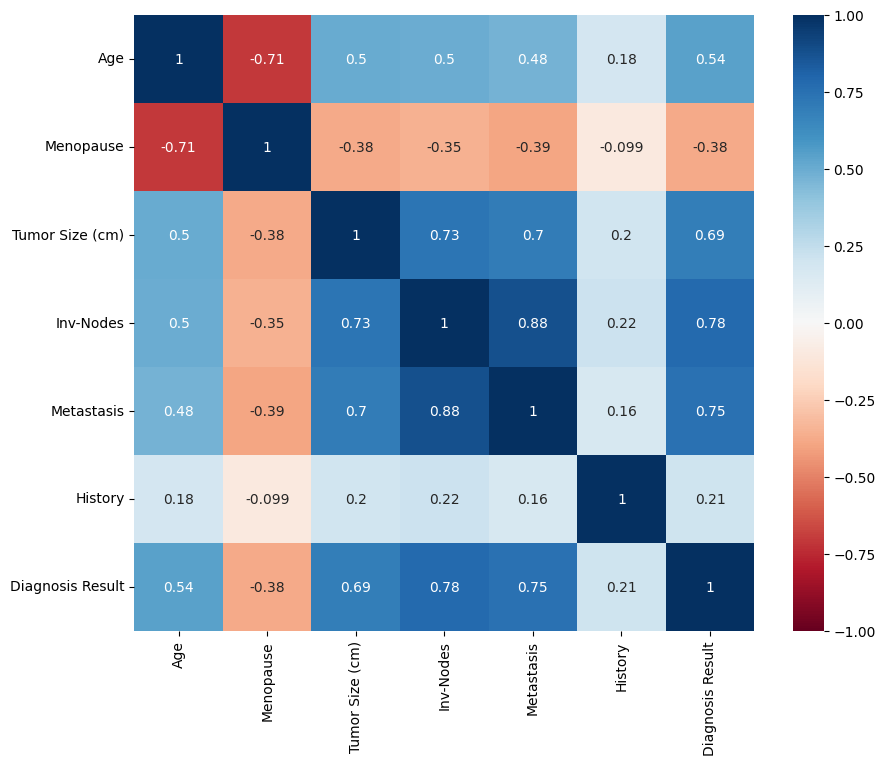

In [46]:
#Check for correlation using a heatmap
corr=df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True ,vmin = -1,
            vmax = 1,
            cmap = 'RdBu')

MODELLING

DEFINING THE DEPEDENT AND INDEPENDENT VARIABLES

In [47]:
#Split the dataset
X = df.drop('Diagnosis Result' , axis=1)
y = df["Diagnosis Result"]

In [48]:
X.sample(5)

,Age,Menopause,Tumor Size (cm),Inv-Nodes,Metastasis,History
117,46,0,6,0,0,1
168,14,1,3,0,0,0
119,18,1,2,0,0,0
35,61,0,4,1,1,1
101,57,0,9,1,1,0


In [49]:
y.sample(5)

86     1
151    1
141    1
54     0
25     0
Name: Diagnosis Result, dtype: object

MODEL TRAINING

In [50]:
# import the package for spliting dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

CHECK THE BEST MODEL FOR TRAINING

In [51]:
from sklearn.linear_model import LogisticRegression
#Logistic regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

#predictions
predictions_lr = lr.predict(X_test)

# Metrics
print(f"LogisticRegression R^2 Score: {r2_score(y_test, predictions_lr)}")
print(f"LogisticRegression Mean Absolute Error: {mean_absolute_error(y_test, predictions_lr)}")
print(f"LogisticRegression Mean Squared Error: {mean_squared_error(y_test, predictions_lr)}")

LogisticRegression R^2 Score: 0.4057971014492754
LogisticRegression Mean Absolute Error: 0.14634146341463414
LogisticRegression Mean Squared Error: 0.14634146341463414


In [52]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predictions
predictions_rf = rf.predict(X_test)

# Metrics
print(f"Random Forest R^2 Score: {r2_score(y_test, predictions_rf)}")
print(f"Random Forest Mean Absolute Error: {mean_absolute_error(y_test, predictions_rf)}")
print(f"Random Forest Mean Squared Error: {mean_squared_error(y_test, predictions_rf)}")

Random Forest R^2 Score: 0.6506552663043478
Random Forest Mean Absolute Error: 0.11971951219512195
Random Forest Mean Squared Error: 0.08603731097560977


In [53]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predictions
predictions_dt = dt.predict(X_test)

# Metrics
print(f"Decision Tree R^2 Score: {r2_score(y_test, predictions_dt)}")
print(f"Decision Tree Mean Absolute Error: {mean_absolute_error(y_test, predictions_dt)}")
print(f"Decision Tree Mean Squared Error: {mean_squared_error(y_test, predictions_dt)}")

Decision Tree R^2 Score: 0.5791062801932367
Decision Tree Mean Absolute Error: 0.10975609756097561
Decision Tree Mean Squared Error: 0.10365853658536585


 NB: From the above analysis the best algorithm to use is a Random Forest based on the R^2 Score. This means that dependent variable can be explained by the independent variable(s) in a regression model.

In [54]:
#USING random Forest for the model train
rf= RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2,n_estimators= 50)

In [55]:
#training the model
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [56]:
#prediction
y_pred_class = rf.predict(X_test)

In [57]:
#Printing the classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        23
           1       0.94      0.83      0.88        18

    accuracy                           0.90        41
   macro avg       0.91      0.89      0.90        41
weighted avg       0.91      0.90      0.90        41



To conclude, the classification report demonstrates that the model performs effectively, achieving an overall accuracy of 88%. Both classes exhibit high precision and recall scores, with particularly strong performance for class 0. This indicates that the model is proficient at correctly identifying instances from both classes while maintaining a well-balanced trade-off between precision and recall, highlighting its reliability in classification tasks.

CONFUSION MATRIX

In [58]:
#Checking model performance
print(metrics.confusion_matrix(y_test, y_pred_class))

[[22  1]
 [ 3 15]]


 ##Interpretation for the above results

TP - We correctly predicted 21 people have breast cancer

TN-  We correctly predicted 15 people dont have breast cancer

FP - We incorrectly predicted 3 people have breast cancer

FN-  We incorrectly predicted 2 do not have breast cancer

In [59]:
pred_score = rf.predict_proba(X_test)
# pos_label identify which int number is the positive label
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_score[:,1], pos_label=1)
auc = metrics.auc(fpr, tpr)
auc

c:\Users\san\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


np.float64(nan)

In [60]:
# store the predicted probabilities for class 1
y_pred_prob = rf.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

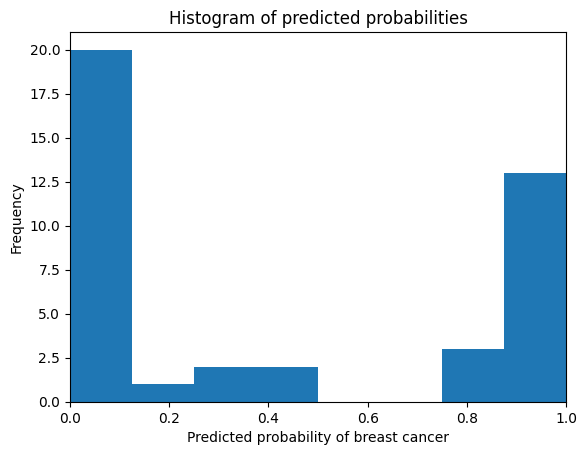

In [61]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of breast cancer')
plt.ylabel('Frequency')

HYPOTHEISIS

##TESTING THE HYPOTHESIS

H1: Women with a family history of breast cancer are more likely to be classified as high-risk for breast cancer by machine learning models compared to those without a family history.
(H0): There is no significant difference in the classification of high-risk breast cancer between women with a family history of breast cancer and those without a family history.

This hypothesis can be tested by analyzing patient data that includes family history as a feature in the mode.


Conclusion
As indicated by the visualizations and statistical analyses performed, we fail to reject the null hypothesis. The results suggest that there is no significant correlation between family history and the diagnosis of breast cancer in the patient population studied. This finding highlights the need for further investigation into other risk factors that may contribute to breast cancer classification and underscores the importance of refining predictive models to enhance their accuracy in clinical settings.